# Importando dependências e configurando o ambiente:

In [ ]:
# Confirmando que estamos utilizando GPU:
!nvidia-smi

#Caso contrário: Editar -> Configurações do notebook -> Na opção de aceleração de hardware selecione uma gpu e clique em salvar.

Thu Jan  4 13:33:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
#importando a biblioteca os e descobrindo o diretório atual do projeto
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
#Importando módulos para output e o yolo da biblioteca ultranalytics

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.7/78.2 GB disk)


# Definindo o dataset:

In [ ]:
#Código de download do dataset escolhido no site Roboflow

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="qd4wOnttjbpO8G80aD2w")
project = rf.workspace("tasarimproject").project("car-space-find")
dataset = project.version(2).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Car-Space-Find-2 in yolov8:: 100%|██████████| 3052/3052 [00:01<00:00, 2384.50it/s]


# Realizando o treinamento e visualizando informações:

In [ ]:
#Treinando o modelo com o dataset escolhido
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/Car-Space-Find-2/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, 

/content


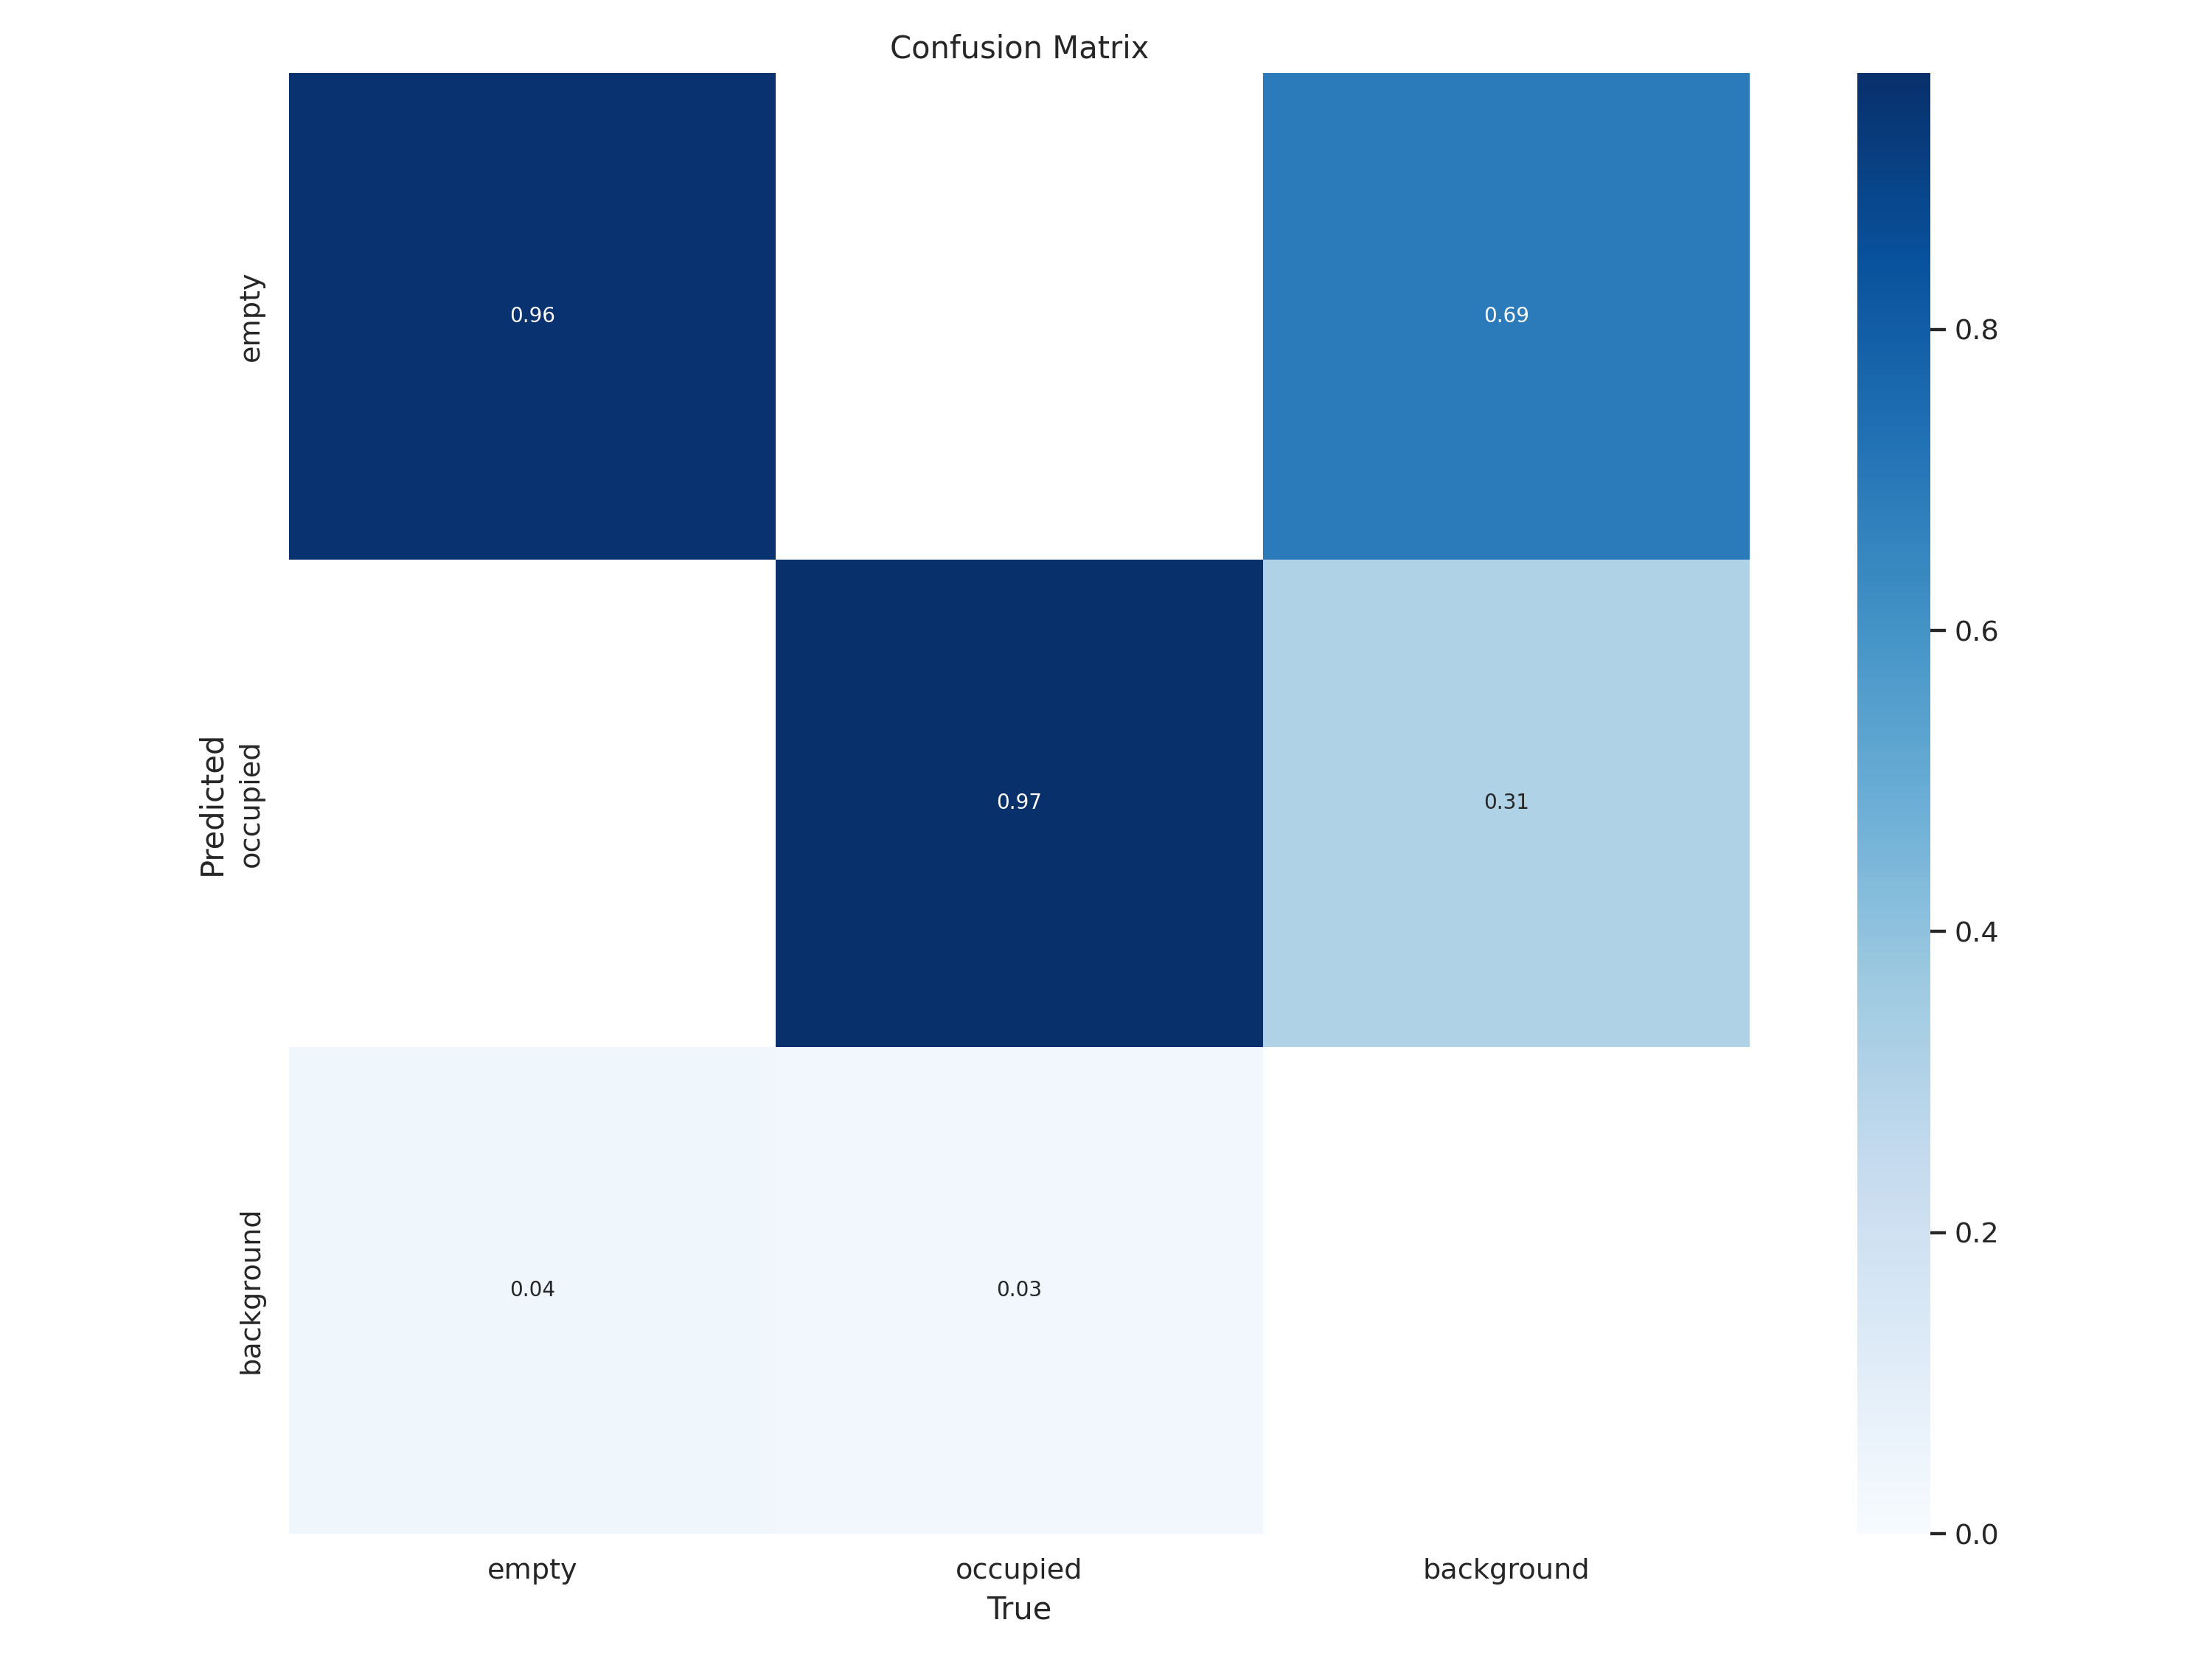

In [ ]:
#Visualizando a matriz de confusão
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train11/confusion_matrix.png', width=600)

/content


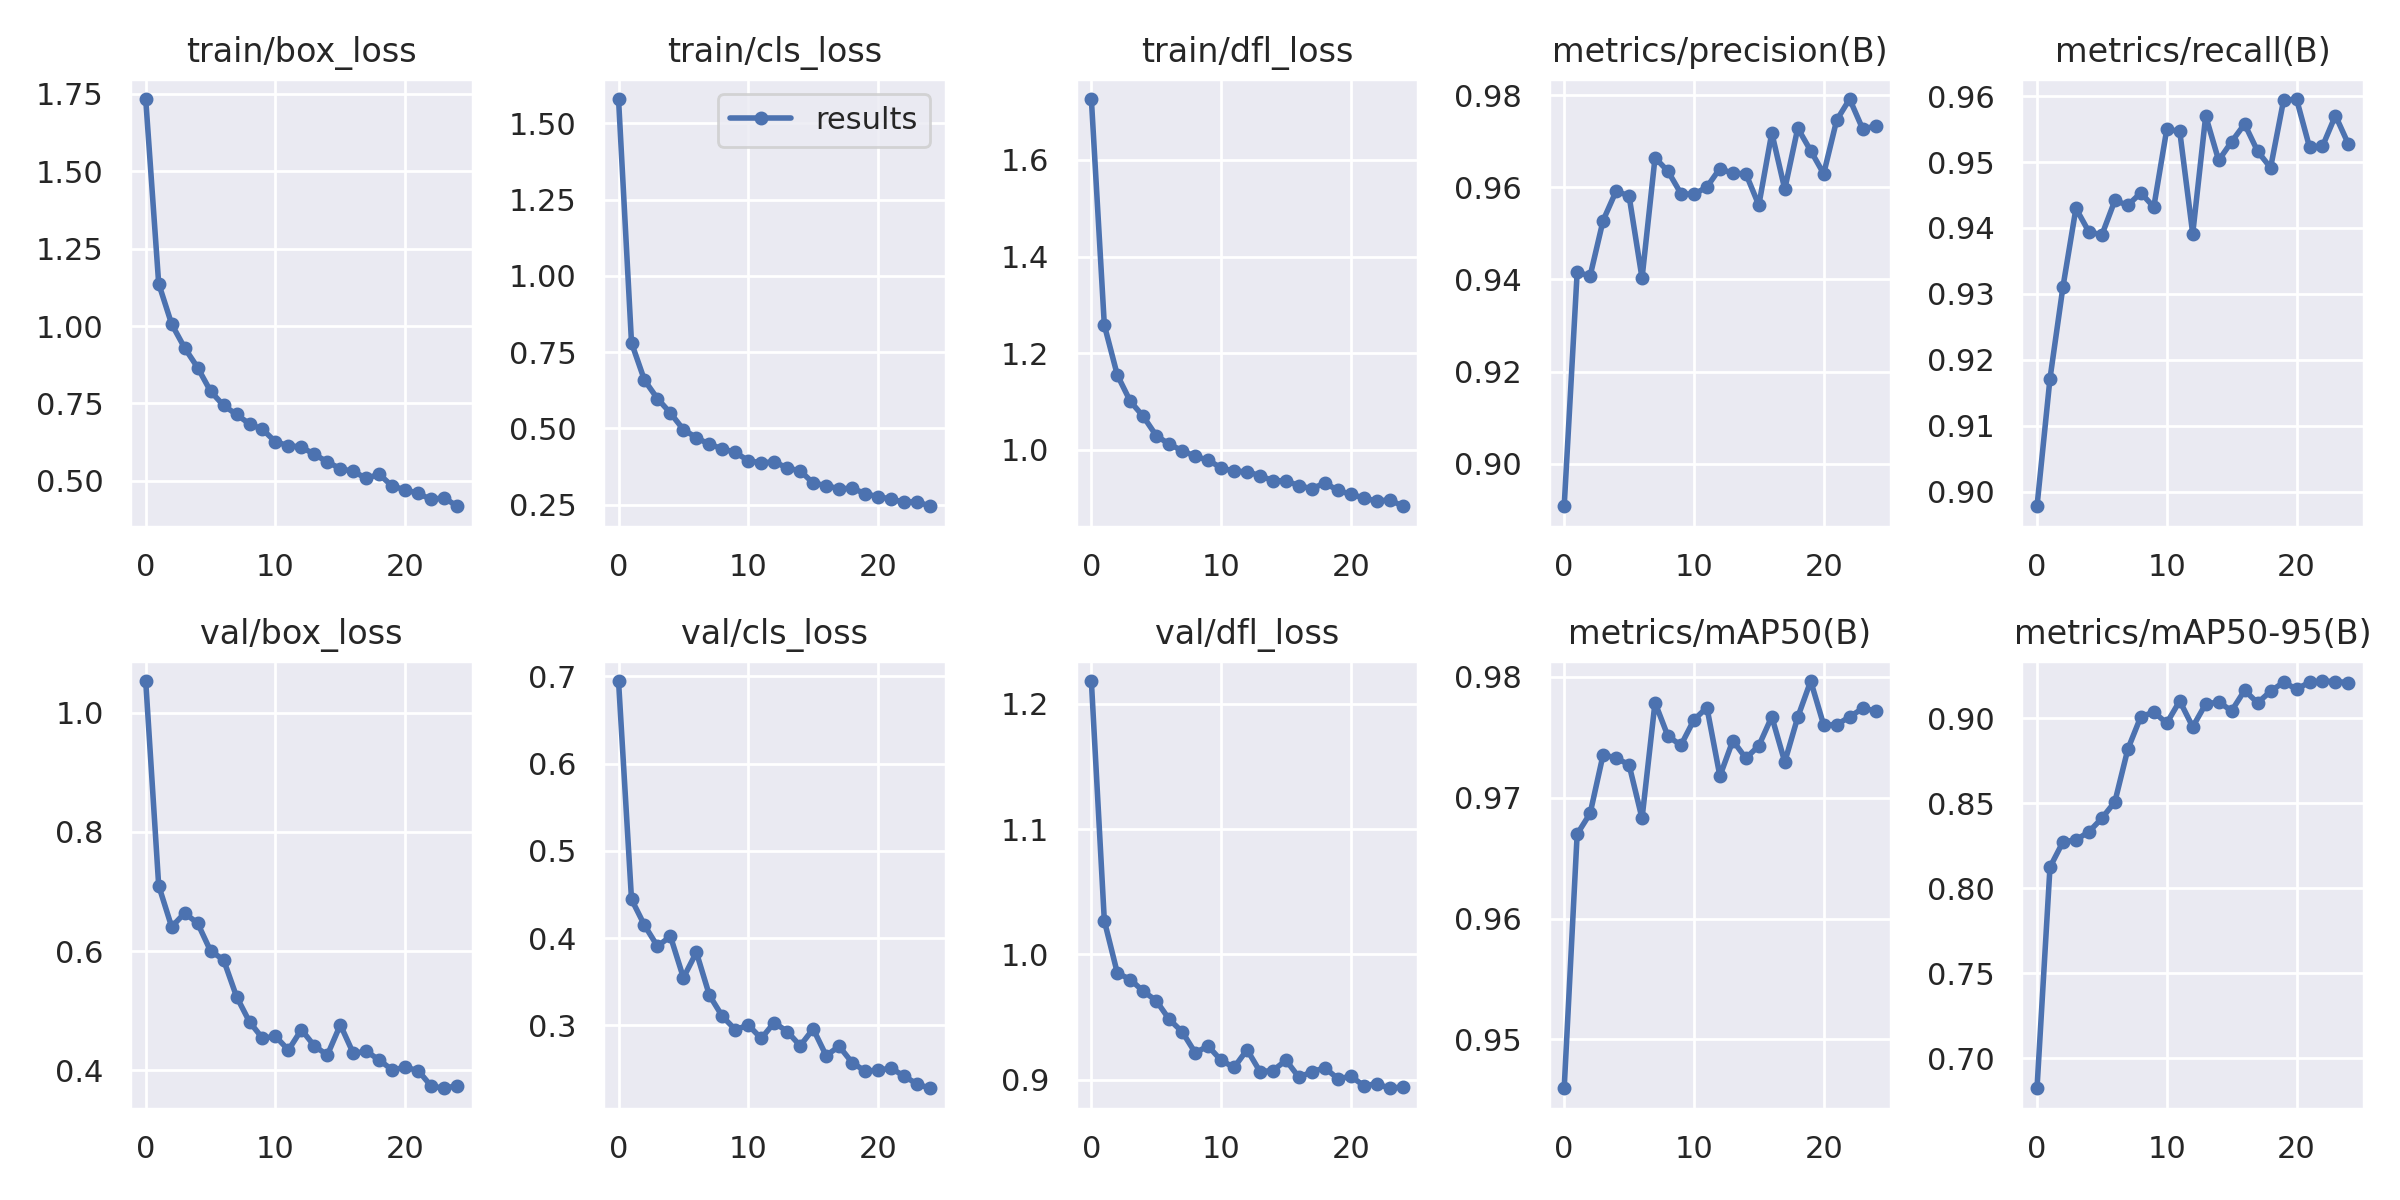

In [ ]:
#Visualizando as plotagens dos gráficos de treinamento
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train11/results.png', width=600)

/content


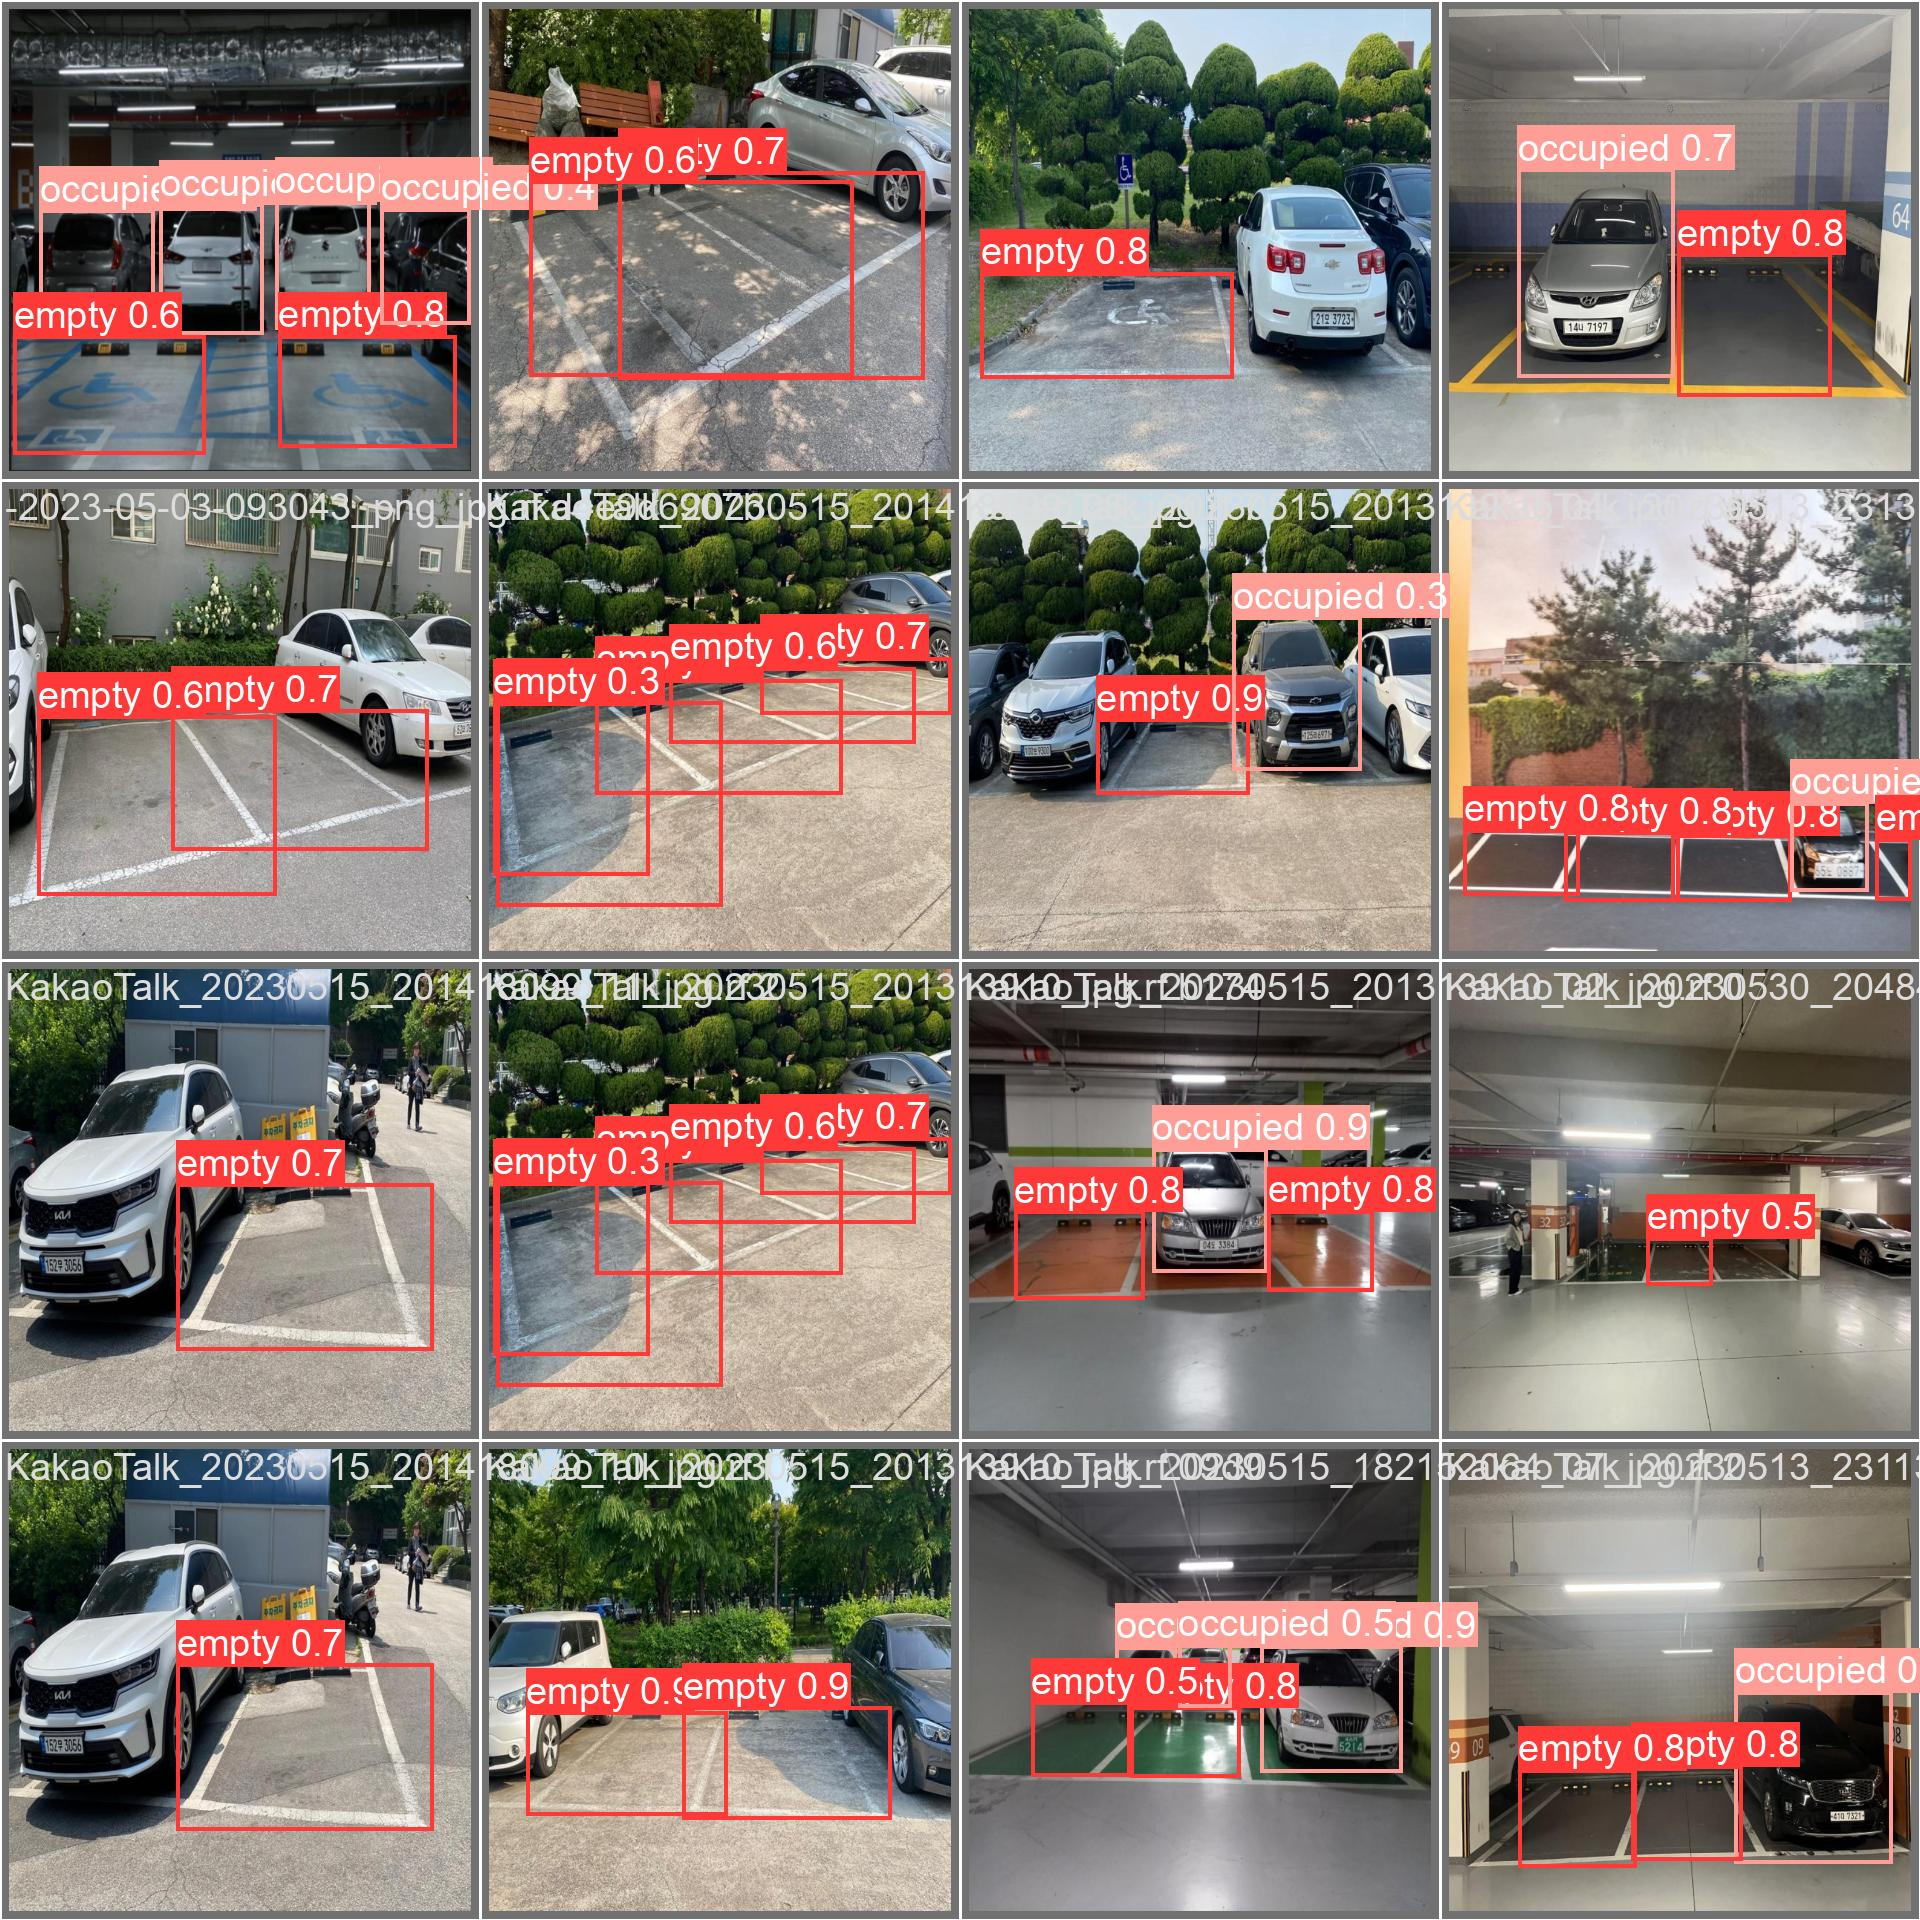

In [ ]:
#Visualizando imagens dos passos de treino
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train11/val_batch0_pred.jpg', width=600)

In [ ]:
#Validando o modelo treinado
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train11/weights/best.pt data={dataset.location}/data.yaml

/content
2024-01-04 14:59:07.119508: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-04 14:59:07.119550: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-04 14:59:07.120879: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-04 14:59:08.170057: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Car-Space-Find-2/valid/labels.cache... 11

# Realizando uma inferência utilizando o modelo que treinado:

In [ ]:
#Realizando predições com o modelo treinado sobre o dataset de testes
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train11/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2024-01-04 15:01:44.419526: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-04 15:01:44.419577: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-04 15:01:44.420921: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-04 15:01:45.519087: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/21 /content/Ca

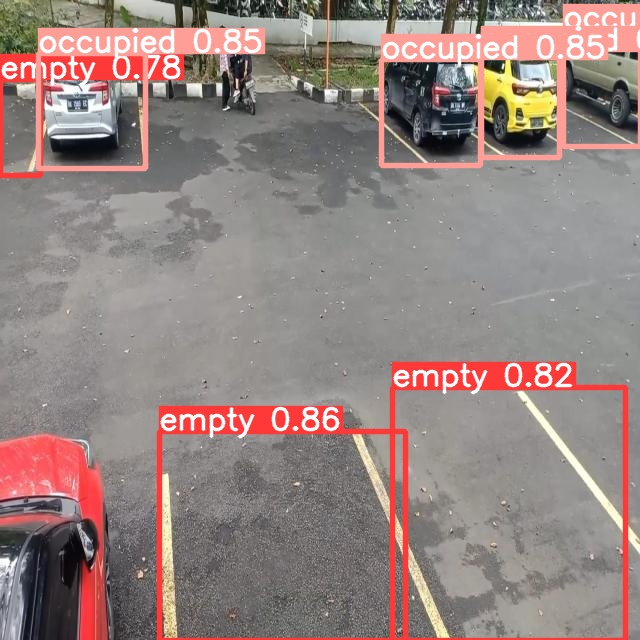

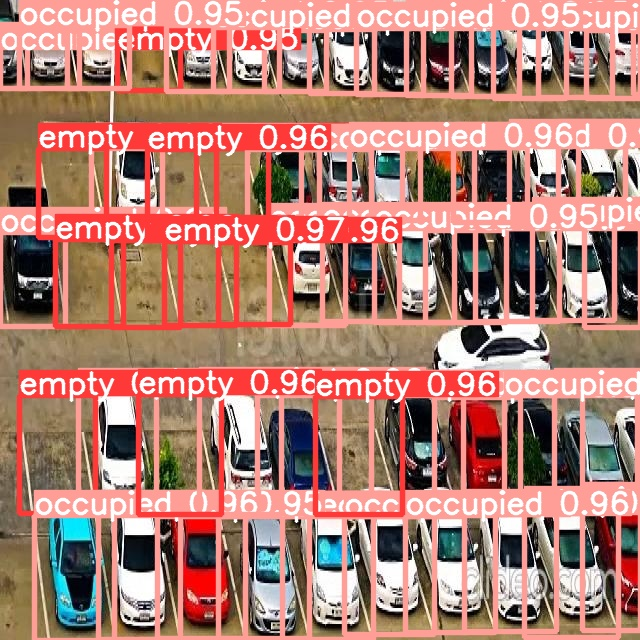

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[11:13]:
      display(Image(filename=image_path, width=600))
      print("\n")